In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

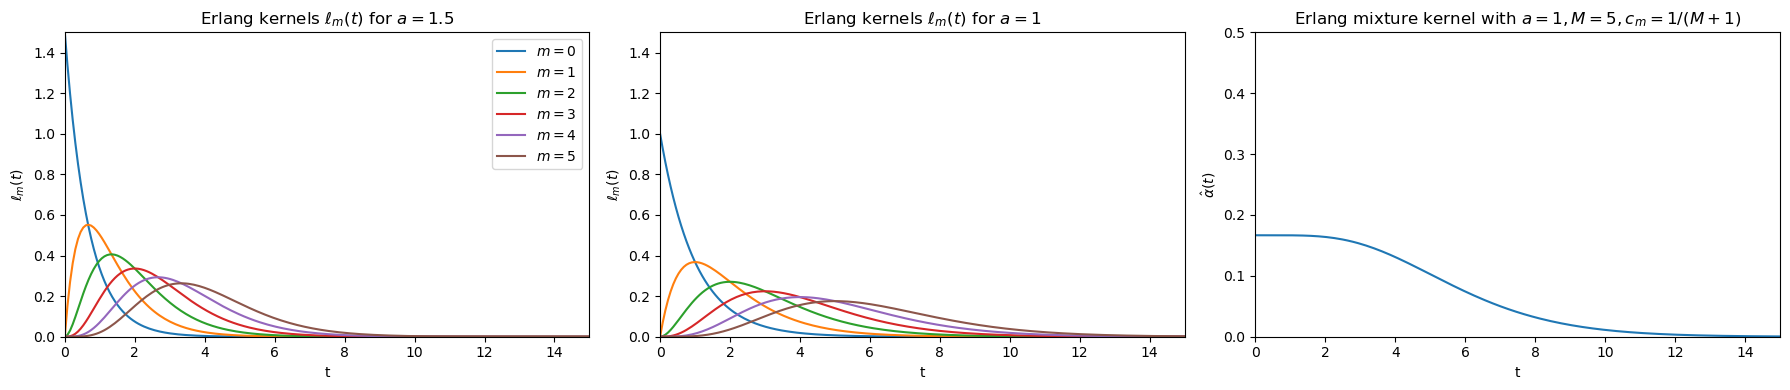

In [ ]:
def l_m(t, a, m): #erlang kernel
    b_m=a**(m+1)/math.factorial(m)
    return b_m * t**m * np.exp(-a*t)

def EMK(t, a, M): #erlang mixture kernel
    c=np.ones(M+1)/(M+1) #assuming m=0,...,M where each c_m=1/(M+1)
    x=[]
    for m in range(0,M+1):
        x.append(l_m(t,a, m))
    return c@x

t=np.linspace(0,15, 200)
x=[]
for m in range(0,6):
    x.append(l_m(t,1.5, m))

# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot x1(t)
for m in range(0,6):
    axes[0].plot(t, x[m], label=f'$m={m}$')
axes[0].legend()
axes[0].set_ylim(0, 1.5)
axes[0].set_xlim(0, 15)
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\ell_m(t)$")
axes[0].set_title(r"Erlang kernels $\ell_m(t)$ for $a=1.5$")

x=[]
for m in range(0,6):
    x.append(l_m(t,1, m))

# Plot x2(t)
for m in range(0,6):
    axes[1].plot(t, x[m], label=f'$m={m}$')
axes[1].set_ylim(0, 1.5)
axes[1].set_xlim(0, 15)
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\ell_m(t)$")
axes[1].set_title(r"Erlang kernels $\ell_m(t)$ for $a=1$")

M=5
mixture=EMK(t,1,M)

#Plot phase portrait x1 vs x2
axes[2].plot(t, mixture)
axes[2].set_xlim(0, 15)
axes[2].set_ylim(0, 0.5)
axes[2].set_xlabel("t")
axes[2].set_ylabel(r"$\hat{\alpha}(t)$")
axes[2].set_title(r"Erlang mixture kernel with $a=1, M=5, c_m=1/(M+1)$")

plt.tight_layout()
plt.show()